# Problem Set 1

 * **Context**: Consider the dataset used in Koop and Tobias, which concerns the relationship between schooling and wage at the individual level.

 * **Task**: Create a scatter diagram that illustrates the economic returns of schooling to a generalist audience with a taste for minimalism ― say, the readership of the New York Times.

 * **Submission**: Submit your solution via email to simone.santoni.1@city.ac.uk. Late submissions (> October 14, 2020) may not be considered for the in-class presentations.

# Koop & Tobas' Dataset

This dataset comes from the paper by Koop and Tobias, "Learning About
Heterogeneity in Returns to Schooling," Journal of Applied Econometrics, 18,
2004, pp. 827-849.

The file contains the panel of 17,919 observations on the Person ID and 4
time-varying variables. The data were downloaded from the Journal of Applied
Econometrics archive website.

Below is the account of the variables in the file:

+   PERSONID = Person id (ranging from 1 to 2,178),
+   EDUC = Education,
+   LOGWAGE = Log of hourly wage,
+   POTEXPER = Potential experience,
+   TIMETRND = Time trend. Time Invariant
+   ABILITY = Ability,
+   MOTHERED = Mother's education,
+   FATHERED = Father's education,
+   BRKNHOME = Dummy variable for residence in a broken home,
+   SIBLINGS = Number of siblings.

# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset
Please make sure `voravich_ch_smm635_prob1.ipynb` and `koop_tobias.csv` are in the same folder

In [2]:
# import the dataset and store it as `df` variable
df = pd.read_csv('koop_tobias.csv')

# Exploratory Data Analysis (EDA)

Before creating a visualization to present to the audience, I personally think it is great 
to perform exploratory data analysis to understand the data, extract meaningful information from the data 
and clearly specify the message to convey to the audience.

This notebook only demonstrate EDA results that are relevant to the final visualization.

In [3]:
# display the whole dataset
df.head(20)

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
0,1,13,1.82,1,0,1.00,12,12,0,1
1,1,18,3.29,3,7,1.00,12,12,0,1
2,1,18,3.21,5,9,1.00,12,12,0,1
3,1,18,3.06,6,10,1.00,12,12,0,1
4,2,15,2.14,4,6,1.50,12,12,0,1
5,2,15,2.30,5,7,1.50,12,12,0,1
6,2,15,2.40,6,8,1.50,12,12,0,1
7,2,15,2.46,7,9,1.50,12,12,0,1
8,2,15,2.51,8,10,1.50,12,12,0,1
9,2,15,2.50,9,11,1.50,12,12,0,1


In [4]:
# display the type of each variable
df.dtypes

PERSONID       int64
EDUC           int64
LOGWAGE      float64
POTEXPER       int64
TIMETRND       int64
ABILITY      float64
MOTHERED       int64
FATHERED       int64
BRKNHOME       int64
SIBLINGS       int64
dtype: object

In [5]:
# display the descriptive statistics of the data
# the `PERSONID` column does not give any meaningful statistics information, and thus I decided to exclude it
df.loc[:, df.columns != 'PERSONID'].describe()

,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
count,17919.000000,17919.000000,17919.000000,17919.000000,17919.000000,17919.000000,17919.000000,17919.000000,17919.000000
mean,12.676042,2.296821,8.362688,8.196719,0.052374,11.471901,11.709247,0.153859,3.156203
std,1.922433,0.528236,4.127502,3.956042,0.926129,2.988851,3.766923,0.360824,2.120989
min,9.000000,0.070000,0.000000,0.000000,-4.040000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.960000,5.000000,5.000000,-0.510000,11.000000,10.000000,0.000000,2.000000
50%,12.000000,2.310000,8.000000,9.000000,0.210000,12.000000,12.000000,0.000000,3.000000
75%,14.000000,2.660000,11.000000,12.000000,0.770000,12.000000,14.000000,0.000000,4.000000
max,20.000000,4.570000,22.000000,14.000000,2.010000,20.000000,20.000000,1.000000,18.000000


In [6]:
# display the correlation matrix
df.loc[:, df.columns != 'PERSONID'].corr().style.background_gradient(cmap='Blues').format('{0:,.3f}')

,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
EDUC,1.000,0.278,-0.219,0.191,0.528,0.348,0.374,-0.107,-0.187
LOGWAGE,0.278,1.000,0.218,0.255,0.218,0.129,0.147,-0.066,-0.038
POTEXPER,-0.219,0.218,1.000,0.769,-0.222,-0.140,-0.147,0.025,0.111
TIMETRND,0.191,0.255,0.769,1.000,0.037,0.016,0.036,0.011,-0.027
ABILITY,0.528,0.218,-0.222,0.037,1.000,0.450,0.449,-0.061,-0.243
MOTHERED,0.348,0.129,-0.140,0.016,0.450,1.000,0.679,-0.031,-0.302
FATHERED,0.374,0.147,-0.147,0.036,0.449,0.679,1.000,-0.051,-0.256
BRKNHOME,-0.107,-0.066,0.025,0.011,-0.061,-0.031,-0.051,1.000,0.030
SIBLINGS,-0.187,-0.038,0.111,-0.027,-0.243,-0.302,-0.256,0.030,1.000


* The followings variables possess highest correlation with `LOGWAGE` : `EDUC`, `TIMETREND`, `POTEXPER`, `ABILITY`
* There are positive correlations among the following variables: `EDUC`, `ABILITY`, `MOTHERED`, `FATHERED`
* There appears a strong positive correlation between `POTEXPER` and `TIMETRND`, which is obvious due to the data collection method.

# Planning
To illustrate the relationship between schooling and wage, I decided to make a scatterplot between `TIMETRND`(x-axis) and `LOGWAGE` (y-axis) using different colors for a dummy variable named `RETURNTOSCHOOL` to distinguish between person who returned to study and vice versa. Since there are also correlation between `LOGWAGE` and `ABILITY`, I decided to differentiate low-high ability into two groups via `HIGH_ABILITY` dummy variable using the average as a cut-off value

# Data Cleaning

In [7]:
df.head(5)

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
0,1,13,1.82,1,0,1.0,12,12,0,1
1,1,18,3.29,3,7,1.0,12,12,0,1
2,1,18,3.21,5,9,1.0,12,12,0,1
3,1,18,3.06,6,10,1.0,12,12,0,1
4,2,15,2.14,4,6,1.5,12,12,0,1


In [8]:
# create a pandas serie that contains True if the individual return to study and False vice versa
RETURNTOSCHOOL = df.groupby('PERSONID')['EDUC'].agg(lambda x: x.max() - x.min())>0

In [9]:
# rename the column name to 'RETURNTOSCHOOL' before merging this serie into pandas dataframe
RETURNTOSCHOOL.rename('RETURNTOSCHOOL', inplace = True)

PERSONID
1        True
2       False
3       False
4        True
5       False
        ...  
2174    False
2175     True
2176    False
2177    False
2178    False
Name: RETURNTOSCHOOL, Length: 2178, dtype: bool

In [10]:
# merge the data into a new dataframe named df_t (t stands for 'transformed')
df_t = pd.merge(df, RETURNTOSCHOOL.astype(int), on = 'PERSONID', how = 'left')
df_t.head()

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS,RETURNTOSCHOOL
0,1,13,1.82,1,0,1.0,12,12,0,1,1
1,1,18,3.29,3,7,1.0,12,12,0,1,1
2,1,18,3.21,5,9,1.0,12,12,0,1,1
3,1,18,3.06,6,10,1.0,12,12,0,1,1
4,2,15,2.14,4,6,1.5,12,12,0,1,0


In [11]:
# create a dummy vairable column named 'HIGH_ABILITY' in df_t dataframe in which 1 mean 
# having above-average ability and 0 vice versa
df_t['HIGH_ABILITY'] =(df_t['ABILITY'] > np.mean(df_t['ABILITY'])).astype(int)
df_t.head()

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS,RETURNTOSCHOOL,HIGH_ABILITY
0,1,13,1.82,1,0,1.0,12,12,0,1,1,1
1,1,18,3.29,3,7,1.0,12,12,0,1,1,1
2,1,18,3.21,5,9,1.0,12,12,0,1,1,1
3,1,18,3.06,6,10,1.0,12,12,0,1,1,1
4,2,15,2.14,4,6,1.5,12,12,0,1,0,1


## Prepare tables for visualization

In [12]:
df_viz = df_t[['PERSONID', 'LOGWAGE', 'TIMETRND', 'RETURNTOSCHOOL', 'HIGH_ABILITY']]
df_viz.head()

,PERSONID,LOGWAGE,TIMETRND,RETURNTOSCHOOL,HIGH_ABILITY
0,1,1.82,0,1,1
1,1,3.29,7,1,1
2,1,3.21,9,1,1
3,1,3.06,10,1,1
4,2,2.14,6,0,1


In [13]:
df_viz_highabi = df_viz[df_viz['HIGH_ABILITY']==1]
df_viz_highabi

,PERSONID,LOGWAGE,TIMETRND,RETURNTOSCHOOL,HIGH_ABILITY
0,1,1.82,0,1,1
1,1,3.29,7,1,1
2,1,3.21,9,1,1
3,1,3.06,10,1,1
4,2,2.14,6,0,1
...,...,...,...,...,...
17913,2177,2.26,10,0,1
17914,2177,1.89,11,0,1
17915,2177,2.10,12,0,1
17916,2177,2.03,13,0,1


In [14]:
df_viz_lowabi = df_viz[df_viz['HIGH_ABILITY']==0]
df_viz_lowabi

,PERSONID,LOGWAGE,TIMETRND,RETURNTOSCHOOL,HIGH_ABILITY
13,3,1.56,2,0,0
71,12,2.41,2,0,0
72,12,2.60,3,0,0
73,12,2.16,4,0,0
74,12,2.81,5,0,0
...,...,...,...,...,...
17902,2176,2.30,10,0,0
17903,2176,2.27,11,0,0
17904,2176,2.42,12,0,0
17905,2176,2.52,13,0,0


# Visualization

In [15]:
plt.style.use('default')

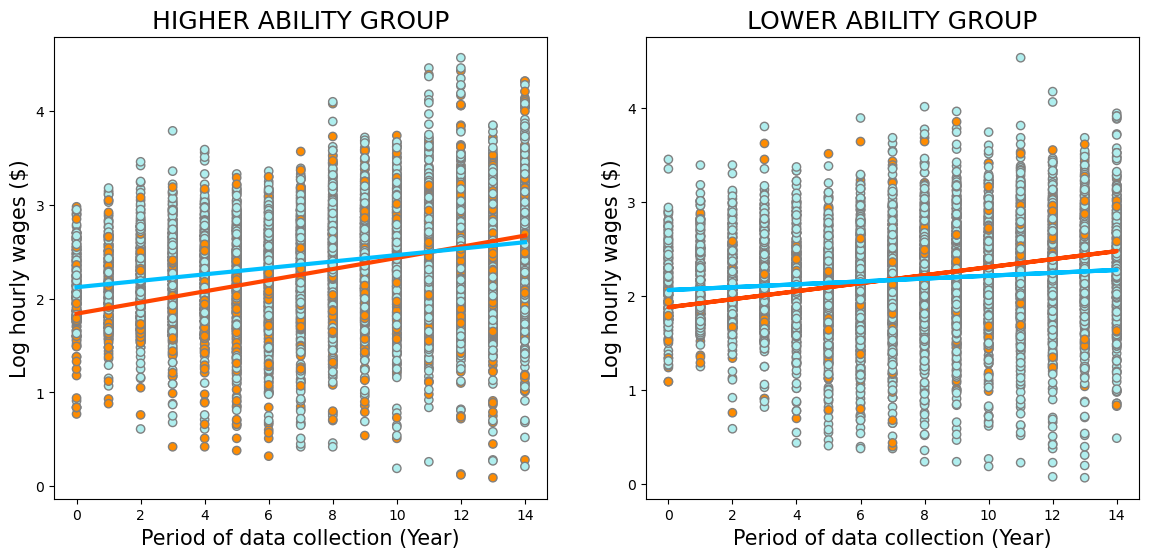

In [16]:
# create the figure
fig = plt.figure(figsize=(14, 6))

# generate fitted lines using np.polyfit() to fit a linear regression
# h for high_ability, l for low_ability, r for return_to_school, n for not_return_to_school
hr_slope, hr_intercept = np.polyfit(df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==1]['TIMETRND'], 
                                    df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==1]['LOGWAGE'], 1)
hn_slope, hn_intercept = np.polyfit(df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==0]['TIMETRND'],
                                    df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==0]['LOGWAGE'], 1)
lr_slope, lr_intercept = np.polyfit(df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==1]['TIMETRND'], 
                                    df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==1]['LOGWAGE'], 1)
ln_slope, ln_intercept = np.polyfit(df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==0]['TIMETRND'],
                                    df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==0]['LOGWAGE'], 1)

# populating the figure with a plot
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# determine colors for the visualization
colors = {0: 'paleturquoise', 1: 'darkorange'}

# plot scatterplot
ax0.scatter(df_viz_highabi['TIMETRND'], df_viz_highabi['LOGWAGE'], 
            c = df_viz_highabi['RETURNTOSCHOOL'].apply(lambda x: colors[x]), edgecolor='grey')
ax1.scatter(df_viz_lowabi['TIMETRND'], df_viz_lowabi['LOGWAGE'], 
            c = df_viz_lowabi['RETURNTOSCHOOL'].apply(lambda x: colors[x]), edgecolor='grey')

# plot fitted lines
ax0.plot(df_viz_highabi['TIMETRND'], hr_slope*df_viz_highabi['TIMETRND'] + hr_intercept, 
         color = 'orangered', linewidth = 3)
ax0.plot(df_viz_highabi['TIMETRND'], hn_slope*df_viz_highabi['TIMETRND'] + hn_intercept, 
         color = 'deepskyblue', linewidth = 3)
ax1.plot(df_viz_lowabi['TIMETRND'], lr_slope*df_viz_lowabi['TIMETRND'] + lr_intercept, 
         color = 'orangered', linewidth = 3)
ax1.plot(df_viz_lowabi['TIMETRND'], ln_slope*df_viz_lowabi['TIMETRND'] + ln_intercept, 
         color = 'deepskyblue', linewidth = 3)

# label titles
ax0.set_title('HIGHER ABILITY GROUP', fontsize = 18)
ax1.set_title('LOWER ABILITY GROUP', fontsize = 18)

# label axes
ax0.set_ylabel('Log hourly wages ($)', fontsize = 15)
ax0.set_xlabel('Period of data collection (Year)', fontsize = 15)
ax1.set_ylabel('Log hourly wages ($)', fontsize = 15)
ax1.set_xlabel('Period of data collection (Year)', fontsize = 15)

plt.show()

Note: After seeing the visualizations, I think the plots contain too many observations which may not be suitable for the audience. Therefore, I think it would be better to convey the message via an average of each collection period.

# Final data cleaning

In [17]:
# Selected only relevant variables and created an aggregated table to get mean log wages
df_viz_highabi_avg = pd.DataFrame(df_viz_highabi.groupby(['TIMETRND', 'RETURNTOSCHOOL'])['LOGWAGE'].agg('mean'))
df_viz_highabi_avg.reset_index(inplace=True)
df_viz_highabi_avg.head()

,TIMETRND,RETURNTOSCHOOL,LOGWAGE
0,0,0,2.224110
1,0,1,1.861856
2,1,0,2.210978
3,1,1,1.927895
4,2,0,2.246250


In [18]:
# Selected only relevant variables and created an aggregated table to get mean log wages
df_viz_lowabi_avg = pd.DataFrame(df_viz_lowabi.groupby(['TIMETRND', 'RETURNTOSCHOOL'])['LOGWAGE'].agg('mean'))
df_viz_lowabi_avg.reset_index(inplace=True)
df_viz_lowabi_avg.head()

,TIMETRND,RETURNTOSCHOOL,LOGWAGE
0,0,0,2.171548
1,0,1,1.870233
2,1,0,2.199747
3,1,1,1.915410
4,2,0,2.148094


# Final Visualization

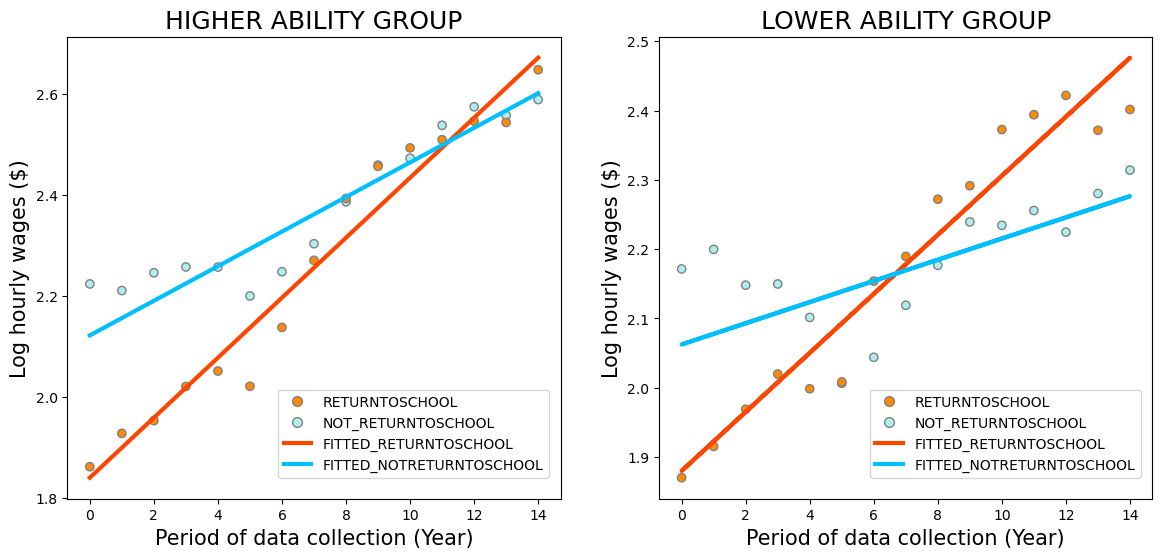

In [19]:
# create the figure
fig = plt.figure(figsize=(14, 6))

# generate fitted lines using np.polyfit() to fit a linear regression
# h for high_ability, l for low_ability, r for return_to_school, n for not_return_to_school
hr_slope, hr_intercept = np.polyfit(df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==1]['TIMETRND'], 
                                    df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==1]['LOGWAGE'], 1)
hn_slope, hn_intercept = np.polyfit(df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==0]['TIMETRND'],
                                    df_viz_highabi[df_viz_highabi['RETURNTOSCHOOL']==0]['LOGWAGE'], 1)
lr_slope, lr_intercept = np.polyfit(df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==1]['TIMETRND'], 
                                    df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==1]['LOGWAGE'], 1)
ln_slope, ln_intercept = np.polyfit(df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==0]['TIMETRND'],
                                    df_viz_lowabi[df_viz_lowabi['RETURNTOSCHOOL']==0]['LOGWAGE'], 1)

# populating the figure with a plot
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# determine colors for the visualization
colors = {0: 'paleturquoise', 1: 'darkorange'}

# plot scatterplot
ax0.scatter(df_viz_highabi_avg['TIMETRND'], df_viz_highabi_avg['LOGWAGE'], 
            c = df_viz_highabi_avg['RETURNTOSCHOOL'].apply(lambda x: colors[x]), edgecolor='grey')
ax1.scatter(df_viz_lowabi_avg['TIMETRND'], df_viz_lowabi_avg['LOGWAGE'], 
            c = df_viz_lowabi_avg['RETURNTOSCHOOL'].apply(lambda x: colors[x]), edgecolor='grey')

# plot fitted lines
ax0.plot(df_viz_highabi['TIMETRND'], hr_slope*df_viz_highabi['TIMETRND'] + hr_intercept, 
         color = 'orangered', linewidth = 3)
ax0.plot(df_viz_highabi['TIMETRND'], hn_slope*df_viz_highabi['TIMETRND'] + hn_intercept, 
         color = 'deepskyblue', linewidth = 3)
ax1.plot(df_viz_lowabi['TIMETRND'], lr_slope*df_viz_lowabi['TIMETRND'] + lr_intercept, 
         color = 'orangered', linewidth = 3)
ax1.plot(df_viz_lowabi['TIMETRND'], ln_slope*df_viz_lowabi['TIMETRND'] + ln_intercept, 
         color = 'deepskyblue', linewidth = 3)

# label titles
ax0.set_title('HIGHER ABILITY GROUP', fontsize = 18)
ax1.set_title('LOWER ABILITY GROUP', fontsize = 18)

# label axes
ax0.set_ylabel('Log hourly wages ($)', fontsize = 15)
ax0.set_xlabel('Period of data collection (Year)', fontsize = 15)
ax1.set_ylabel('Log hourly wages ($)', fontsize = 15)
ax1.set_xlabel('Period of data collection (Year)', fontsize = 15)

# add legends
import matplotlib.lines as mlines

darkorange_dot = mlines.Line2D([], [], color='darkorange', marker='o', markeredgecolor='grey', 
                               linestyle='None', markersize=7, label='RETURNTOSCHOOL')
paleturquoise_dot = mlines.Line2D([], [], color='paleturquoise', marker='o', markeredgecolor='grey',
                                  linestyle='None', markersize=7, label='NOT_RETURNTOSCHOOL')
orangered_line = mlines.Line2D([], [], color='orangered', linewidth=3, label='FITTED_RETURNTOSCHOOL')
deepskyblue_line = mlines.Line2D([], [], color='deepskyblue', linewidth=3, label='FITTED_NOTRETURNTOSCHOOL')

ax0.legend(handles=[darkorange_dot, paleturquoise_dot, orangered_line, deepskyblue_line], 
           loc = 'lower right', bbox_to_anchor=(0.99,0.03))
ax1.legend(handles=[darkorange_dot, paleturquoise_dot, orangered_line, deepskyblue_line],
           loc = 'lower right', bbox_to_anchor=(0.99,0.03))

plt.show()

These two plots illustrate the average log hourly wages by periods of data collection in two groups: `HIGHER ABILITY GROUP` and `LOWER ABILITY GROUP`. A sharp increase in wages for people who returned to study is observed in both higher and lower ability groups though the effect is more clear in the lower ability group.  